In [31]:
!pip install catboost

In [ ]:
!pip install gdown

In [1]:
import pandas as pd
import numpy as np


In [2]:

import gdown

file_id = '1fYGb-n114IGWZDcBKE0jzc3BWSLCcsVQ'
# لینک دانلود مستقیم
url = f'https://drive.google.com/uc?id={file_id}'
output = 'Divar.csv'  # نام فایلی که می‌خوای ذخیره بشه، پسوند رو مناسب بزار، مثل .csv یا .zip یا هر چی هست

gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1fYGb-n114IGWZDcBKE0jzc3BWSLCcsVQ
From (redirected): https://drive.google.com/uc?id=1fYGb-n114IGWZDcBKE0jzc3BWSLCcsVQ&confirm=t&uuid=06a3b1af-9615-4fed-99f3-f97d24b764cc
To: /content/Divar.csv
100%|██████████| 794M/794M [00:06<00:00, 125MB/s]


'Divar.csv'

In [3]:
df = pd.read_csv('Divar.csv')

/tmp/ipython-input-1116618770.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Divar.csv')


In [4]:
divar_df = df.copy()

In [5]:
divar_df['cat2_slug'].unique()

array(['temporary-rent', 'residential-sell', 'residential-rent',
       'commercial-rent', 'commercial-sell', 'real-estate-services'],
      dtype=object)

In [6]:
divar_df = divar_df[(divar_df['cat2_slug'] != 'real-estate-services') & (divar_df['cat2_slug'] != 'temporary-rent')]

In [8]:
divar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950694 entries, 1 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  950694 non-null  int64  
 1   cat2_slug                   950694 non-null  object 
 2   cat3_slug                   950693 non-null  object 
 3   city_slug                   950692 non-null  object 
 4   neighborhood_slug           418689 non-null  object 
 5   created_at_month            950694 non-null  object 
 6   user_type                   279162 non-null  object 
 7   description                 950694 non-null  object 
 8   title                       950647 non-null  object 
 9   rent_mode                   352989 non-null  object 
 10  rent_value                  351317 non-null  float64
 11  rent_to_single              19 non-null      object 
 12  rent_type                   103957 non-null  object 
 13  price_mode         

#*building_size*

In [9]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['building_size']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  5 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  11 21855
plot-old :  11 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  30 45993
industry-agriculture-business-rent :  15 9155
office-sell :  0 5155
industry-agriculture-business-sell :  19 11851
nan :  0 0


#rooms_count

In [10]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['rooms_count']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  6 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  11 21855
plot-old :  133569 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  30 45993
industry-agriculture-business-rent :  382 9155
office-sell :  0 5155
industry-agriculture-business-sell :  581 11851
nan :  0 0


In [11]:
def rooms_counts_convertor(rooms_count) :
    if rooms_count == 'یک' :
        return 1
    elif rooms_count == 'دو' :
        return 2
    elif rooms_count == 'سه' :
        return 3
    elif rooms_count == 'چهار' :
        return 4
    elif rooms_count == 'پنج یا بیشتر' :
        return 5
    elif rooms_count == 'بدون اتاق' :
        return 0

divar_df['rooms_count'] = divar_df['rooms_count'].apply(lambda x: rooms_counts_convertor(x))

In [12]:
divar_df.rooms_count.isna().sum()

np.int64(134689)

#final_price

In [13]:
divar_df['final_price'] = np.where(divar_df['price_value'].notna(), divar_df['price_value'],
    np.where((divar_df['transformable_credit'].notna()) | (divar_df['transformable_rent'].notna()),
        ((divar_df['transformable_credit'].fillna(0) * 30000) / 1000000) + divar_df['transformable_rent'].fillna(0), np.nan)
            )

#construction_year

In [14]:
persian_to_english = str.maketrans("۰۱۲۳۴۵۶۷۸۹", "0123456789")
def convert(x):
    if 'قبل' in str(x):
        return 1369
    elif not pd.notna(x) : return x
    return int(str(x).translate(persian_to_english))

divar_df['construction_year'] = divar_df['construction_year'].apply(convert)

In [15]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['construction_year']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  5 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  11 21855
plot-old :  133569 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  30 45993
industry-agriculture-business-rent :  478 9155
office-sell :  0 5155
industry-agriculture-business-sell :  663 11851
nan :  0 0


In [16]:

divar_df.loc[divar_df['cat3_slug'] == 'plot-old', 'construction_year'].isna().sum()

np.int64(133569)

In [17]:
divar_df.construction_year.isna().sum()

np.int64(134866)

#warehouse

In [18]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['has_warehouse']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  7 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  21855 21855
plot-old :  133569 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  0 5155
industry-agriculture-business-sell :  11850 11851
nan :  0 0


In [19]:
divar_df.loc[divar_df['cat3_slug'] == 'plot-old', 'has_warehouse'] = False

#has_parking

In [20]:
for cat3 in divar_df['cat3_slug'].unique() :
    df = divar_df[divar_df['cat3_slug'] == cat3]['has_parking']
    print(f'{cat3} : ' , df.isnull().sum(), len(df))

apartment-sell :  6 303385
apartment-rent :  13 211880
office-rent :  70 21418
shop-sell :  21855 21855
plot-old :  133569 133570
house-villa-sell :  15 121753
house-villa-rent :  11 64678
shop-rent :  45993 45993
industry-agriculture-business-rent :  9155 9155
office-sell :  0 5155
industry-agriculture-business-sell :  11850 11851
nan :  0 0


In [21]:
data = divar_df[['cat2_slug', 'building_size', 'rooms_count', 'final_price', 'construction_year', 'has_warehouse', 'has_parking',]]


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950694 entries, 1 to 999999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cat2_slug          950694 non-null  object 
 1   building_size      950494 non-null  float64
 2   rooms_count        816005 non-null  float64
 3   final_price        919341 non-null  float64
 4   construction_year  815828 non-null  float64
 5   has_warehouse      861724 non-null  object 
 6   has_parking        728156 non-null  object 
dtypes: float64(4), object(3)
memory usage: 58.0+ MB


#encode

In [23]:
data = pd.get_dummies(data, columns=['cat2_slug'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950694 entries, 1 to 999999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   building_size               950494 non-null  float64
 1   rooms_count                 816005 non-null  float64
 2   final_price                 919341 non-null  float64
 3   construction_year           815828 non-null  float64
 4   has_warehouse               861724 non-null  object 
 5   has_parking                 728156 non-null  object 
 6   cat2_slug_commercial-rent   950694 non-null  bool   
 7   cat2_slug_commercial-sell   950694 non-null  bool   
 8   cat2_slug_residential-rent  950694 non-null  bool   
 9   cat2_slug_residential-sell  950694 non-null  bool   
dtypes: bool(4), float64(4), object(2)
memory usage: 54.4+ MB


#model

In [25]:
data['final_price_log'] = np.log1p(data['final_price'])

In [26]:
Q1 = data['final_price_log'].quantile(0.25)
Q3 = data['final_price_log'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = data[(data['final_price_log'] >= lower) & (data['final_price_log'] <= upper)]

In [27]:
df_clean.columns

Index(['building_size', 'rooms_count', 'final_price', 'construction_year',
       'has_warehouse', 'has_parking', 'cat2_slug_commercial-rent',
       'cat2_slug_commercial-sell', 'cat2_slug_residential-rent',
       'cat2_slug_residential-sell', 'final_price_log'],
      dtype='object')

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 913110 entries, 1 to 999999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   building_size               913039 non-null  float64
 1   rooms_count                 802629 non-null  float64
 2   final_price                 913110 non-null  float64
 3   construction_year           802478 non-null  float64
 4   has_warehouse               831373 non-null  object 
 5   has_parking                 721603 non-null  object 
 6   cat2_slug_commercial-rent   913110 non-null  bool   
 7   cat2_slug_commercial-sell   913110 non-null  bool   
 8   cat2_slug_residential-rent  913110 non-null  bool   
 9   cat2_slug_residential-sell  913110 non-null  bool   
 10  final_price_log             913110 non-null  float64
dtypes: bool(4), float64(5), object(2)
memory usage: 59.2+ MB


In [33]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# دیتافریم تمیزشده

target = "final_price_log"
features = [col for col in df_clean.columns if col not in [target, "final_price"]]

X = df_clean[features]
y = df_clean[target]

# ستون‌های دسته‌ای (categorical)
categorical_features = ["has_warehouse", "has_parking",
                        "cat2_slug_commercial-rent",
                        "cat2_slug_commercial-sell",
                        "cat2_slug_residential-rent",
                        "cat2_slug_residential-sell"]

for col in ["has_warehouse", "has_parking"]:
  df_clean[col] = df_clean[col].fillna("Unknown").astype(str)

# جدا کردن داده به train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ساخت Pool برای CatBoost (بهش ستون‌های دسته‌ای رو می‌دیم)
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# مدل CatBoost
model = CatBoostRegressor(
    iterations=1000,        # تعداد تکرار
    learning_rate=0.1,      # نرخ یادگیری
    depth=8,                # عمق درخت‌ها
    loss_function='RMSE',   # تابع هزینه
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

# آموزش
model.fit(train_pool, eval_set=test_pool, use_best_model=True)

# پیش‌بینی
y_pred = model.predict(X_test)

# ارزیابی
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


/tmp/ipython-input-914372126.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna("Unknown").astype(str)
/tmp/ipython-input-914372126.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna("Unknown").astype(str)


0:	learn: 2.6710181	test: 2.6736188	best: 2.6736188 (0)	total: 924ms	remaining: 15m 23s
100:	learn: 1.2978257	test: 1.3137764	best: 1.3137764 (100)	total: 57.6s	remaining: 8m 32s
200:	learn: 1.2917596	test: 1.3092151	best: 1.3092151 (200)	total: 1m 54s	remaining: 7m 36s
300:	learn: 1.2884415	test: 1.3076972	best: 1.3076972 (300)	total: 2m 57s	remaining: 6m 52s
400:	learn: 1.2861955	test: 1.3072192	best: 1.3072088 (384)	total: 3m 54s	remaining: 5m 50s
500:	learn: 1.2844018	test: 1.3069733	best: 1.3069520 (471)	total: 4m 48s	remaining: 4m 47s
600:	learn: 1.2828719	test: 1.3067214	best: 1.3067098 (593)	total: 5m 44s	remaining: 3m 48s
700:	learn: 1.2815766	test: 1.3067473	best: 1.3066872 (640)	total: 6m 39s	remaining: 2m 50s
800:	learn: 1.2802798	test: 1.3067137	best: 1.3066872 (640)	total: 7m 37s	remaining: 1m 53s
900:	learn: 1.2789585	test: 1.3067624	best: 1.3066769 (852)	total: 8m 33s	remaining: 56.4s
999:	learn: 1.2780379	test: 1.3067975	best: 1.3066769 (852)	total: 9m 26s	remaining: 0

In [34]:
model.get_feature_importance(prettified=True)


,Feature Id,Importances
0,cat2_slug_residential-sell,77.430569
1,cat2_slug_commercial-sell,14.197157
2,building_size,3.414586
3,rooms_count,2.197357
4,has_parking,1.079180
5,construction_year,0.783658
6,has_warehouse,0.377297
7,cat2_slug_residential-rent,0.358099
8,cat2_slug_commercial-rent,0.162099


from matplotlib import pyplot as plt
_df_0['Importances'].plot(kind='hist', bins=20, title='Importances')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Importances'].plot(kind='line', figsize=(8, 4), title='Importances')
plt.gca().spines[['top', 'right']].set_visible(False)

#model_2

In [54]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. فیلتر فقط روی معاملات مسکونی فروش
df_sell = df_clean[df_clean["cat2_slug_residential-sell"] == True].copy()

# 2. تعریف هدف و ویژگی‌ها
target = "final_price_log"
drop_cols = ["final_price", "cat2_slug_residential-sell",  # این ستون ثابت شده
             "cat2_slug_residential-rent",
             "cat2_slug_commercial-rent",
             "cat2_slug_commercial-sell"]

features = [col for col in df_sell.columns if col not in [target] + drop_cols]

X = df_sell[features]
y = df_sell[target]

# ستون‌های دسته‌ای باقی‌مونده
categorical_features = ["has_warehouse", "has_parking"]

# 3. تبدیل NaN به Unknown برای دسته‌ای‌ها
for col in categorical_features:
    X[col] = X[col].fillna("Unknown").astype(str)

# 4. تقسیم train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool  = Pool(X_test, y_test, cat_features=categorical_features)

# 5. مدل CatBoost
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=8,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100,
    early_stopping_rounds=50
)

model.fit(train_pool, eval_set=test_pool, use_best_model=True)

# 6. ارزیابی
y_pred = model.predict(X_test)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))
r2_log = r2_score(y_test, y_pred)

print(f"RMSE (log): {rmse_log:.4f}")
print(f"R² (log):   {r2_log:.4f}")

# --- روی مقیاس واقعی (تومان) ---
y_pred_real = np.exp(y_pred)
y_test_real = np.exp(y_test)

rmse_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
r2_real = r2_score(y_test_real, y_pred_real)

print("\nنتایج روی قیمت واقعی (تومان):")
print(f"RMSE (real): {rmse_real:,.0f} تومان")
print(f"R² (real):   {r2_real:.4f}")


/tmp/ipython-input-1759218805.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna("Unknown").astype(str)
/tmp/ipython-input-1759218805.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna("Unknown").astype(str)


0:	learn: 1.5198949	test: 1.5258255	best: 1.5258255 (0)	total: 350ms	remaining: 5m 49s
100:	learn: 1.4002325	test: 1.4113198	best: 1.4113198 (100)	total: 28.4s	remaining: 4m 12s
200:	learn: 1.3942251	test: 1.4073822	best: 1.4073822 (200)	total: 59.8s	remaining: 3m 57s
300:	learn: 1.3911837	test: 1.4060259	best: 1.4060259 (300)	total: 1m 30s	remaining: 3m 30s
400:	learn: 1.3889345	test: 1.4055041	best: 1.4054933 (396)	total: 1m 59s	remaining: 2m 58s
500:	learn: 1.3868417	test: 1.4052292	best: 1.4052292 (500)	total: 2m 30s	remaining: 2m 29s
600:	learn: 1.3851114	test: 1.4051070	best: 1.4050916 (592)	total: 2m 59s	remaining: 1m 59s
700:	learn: 1.3837127	test: 1.4050827	best: 1.4050652 (674)	total: 3m 33s	remaining: 1m 31s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1.405060497
bestIteration = 705

Shrink model to first 706 iterations.
RMSE (log): 1.4051
R² (log):   0.1736

نتایج روی قیمت واقعی (تومان):
RMSE (real): 120,139,413,813 تومان
R² (real):   0.0018


#model_3

In [37]:
data2 = pd.concat([data, divar_df[['floor', 'has_elevator']]], axis=1)

In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950694 entries, 1 to 999999
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   building_size               950494 non-null  float64
 1   rooms_count                 816005 non-null  float64
 2   final_price                 919341 non-null  float64
 3   construction_year           815828 non-null  float64
 4   has_warehouse               861724 non-null  object 
 5   has_parking                 728156 non-null  object 
 6   cat2_slug_commercial-rent   950694 non-null  bool   
 7   cat2_slug_commercial-sell   950694 non-null  bool   
 8   cat2_slug_residential-rent  950694 non-null  bool   
 9   cat2_slug_residential-sell  950694 non-null  bool   
 10  final_price_log             919341 non-null  float64
 11  floor                       541748 non-null  object 
 12  has_elevator                541749 non-null  object 
dtypes: bool(4), float64

In [39]:
Q1 = data2['final_price_log'].quantile(0.25)
Q3 = data2['final_price_log'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = data2[(data2['final_price_log'] >= lower) & (data2['final_price_log'] <= upper)]

In [41]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# دیتافریم تمیزشده

target = "final_price_log"
features = [col for col in df_clean.columns if col not in [target, "final_price"]]

X = df_clean[features]
y = df_clean[target]

# ستون‌های دسته‌ای (categorical)
categorical_features = ["has_warehouse", "has_parking",
                        "cat2_slug_commercial-rent",
                        "cat2_slug_commercial-sell",
                        "cat2_slug_residential-rent",
                        "cat2_slug_residential-sell",
                        "floor", "has_elevator"]

for col in ["has_warehouse", "has_parking", "floor", "has_elevator"]:
  df_clean[col] = df_clean[col].fillna("Unknown").astype(str)

# جدا کردن داده به train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ساخت Pool برای CatBoost (بهش ستون‌های دسته‌ای رو می‌دیم)
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# مدل CatBoost
model = CatBoostRegressor(
    iterations=1000,        # تعداد تکرار
    learning_rate=0.1,      # نرخ یادگیری
    depth=8,                # عمق درخت‌ها
    loss_function='RMSE',   # تابع هزینه
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

# آموزش
model.fit(train_pool, eval_set=test_pool, use_best_model=True)

# پیش‌بینی
y_pred = model.predict(X_test)

# ارزیابی
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

/tmp/ipython-input-1192741851.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna("Unknown").astype(str)
/tmp/ipython-input-1192741851.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna("Unknown").astype(str)
/tmp/ipython-input-1192741851.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

0:	learn: 2.6676877	test: 2.6702502	best: 2.6702502 (0)	total: 1.1s	remaining: 18m 17s
100:	learn: 1.2668219	test: 1.2830103	best: 1.2830103 (100)	total: 1m 29s	remaining: 13m 15s
200:	learn: 1.2617861	test: 1.2800009	best: 1.2800009 (200)	total: 3m 7s	remaining: 12m 24s
300:	learn: 1.2590710	test: 1.2788487	best: 1.2788436 (297)	total: 4m 45s	remaining: 11m 3s
400:	learn: 1.2569106	test: 1.2784179	best: 1.2784099 (397)	total: 6m 26s	remaining: 9m 37s
500:	learn: 1.2551411	test: 1.2779368	best: 1.2779308 (499)	total: 8m 6s	remaining: 8m 4s
600:	learn: 1.2537788	test: 1.2777812	best: 1.2777699 (595)	total: 9m 46s	remaining: 6m 29s
700:	learn: 1.2525135	test: 1.2776567	best: 1.2776567 (700)	total: 11m 25s	remaining: 4m 52s
800:	learn: 1.2514722	test: 1.2775312	best: 1.2775312 (800)	total: 13m 5s	remaining: 3m 15s
900:	learn: 1.2504336	test: 1.2775441	best: 1.2775195 (804)	total: 14m 46s	remaining: 1m 37s
999:	learn: 1.2493374	test: 1.2774230	best: 1.2774204 (996)	total: 16m 28s	remaining

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# --- پیش‌بینی روی داده تست ---
y_pred_log = model.predict(X_test)

# --- ارزیابی روی مقیاس log ---
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2_log = r2_score(y_test, y_pred_log)

print("🔹 نتایج روی log-price:")
print(f"RMSE (log): {rmse_log:.4f}")
print(f"R² (log):   {r2_log:.4f}")

# --- برگردوندن به مقیاس واقعی ---
y_pred_real = np.exp(y_pred_log)
y_test_real = np.exp(y_test)

rmse_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
r2_real = r2_score(y_test_real, y_pred_real)

print("\n🔹 نتایج روی قیمت واقعی (تومان):")
print(f"RMSE (real): {rmse_real:,.0f} تومان")
print(f"R² (real):   {r2_real:.4f}")

🔹 نتایج روی log-price:
RMSE (log): 1.2774
R² (log):   0.8055

🔹 نتایج روی قیمت واقعی (تومان):
RMSE (real): 85,897,726,665 تومان
R² (real):   0.0061


In [43]:
mape = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 50819.21%


In [44]:
smape = 100 * np.mean(2 * np.abs(y_pred_real - y_test_real) / (np.abs(y_test_real) + np.abs(y_pred_real)))
print(f"SMAPE: {smape:.2f}%")

SMAPE: 55.64%


#model_4

In [45]:
Q1 = data['final_price_log'].quantile(0.25)
Q3 = data['final_price_log'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = data[(data['final_price_log'] >= lower) & (data['final_price_log'] <= upper)]

In [47]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------
# 1. ساخت target جدید: قیمت هر متر مربع
# ------------------------
df_clean["price_per_m2"] = df_clean["final_price"] / df_clean["building_size"]

# حذف ردیف‌هایی که متراژ یا قیمت صفر یا NaN دارن
df_ppm = df_clean.dropna(subset=["price_per_m2", "building_size", "final_price"]).copy()
df_ppm = df_ppm[df_ppm["building_size"] > 0]

# ------------------------
# 2. تعریف target و features
# ------------------------
target = "price_per_m2"
drop_cols = ["final_price", "final_price_log", "price_per_m2"]

features = [col for col in df_ppm.columns if col not in drop_cols]

X = df_ppm[features]
y = df_ppm[target]

# ستون‌های دسته‌ای
categorical_features = ["has_warehouse", "has_parking",
                        "cat2_slug_commercial-rent",
                        "cat2_slug_commercial-sell",
                        "cat2_slug_residential-rent",
                        "cat2_slug_residential-sell"]

# تبدیل NaN در ستون‌های دسته‌ای به "Unknown"
for col in ["has_warehouse", "has_parking"]:
    X[col] = X[col].fillna("Unknown").astype(str)

# ------------------------
# 3. تقسیم داده‌ها
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool  = Pool(X_test, y_test, cat_features=categorical_features)


# 4. مدل CatBoost
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=8,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100,
)

model.fit(train_pool, eval_set=test_pool, use_best_model=True)


# 5. ارزیابی
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🔹 نتایج روی price_per_m2:")
print(f"RMSE: {rmse:,.0f} تومان بر متر مربع")
print(f"R²:   {r2:.4f}")

# SMAPE برای درصد خطا
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
print(f"SMAPE: {smape:.2f}%")


/tmp/ipython-input-944039736.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["price_per_m2"] = df_clean["final_price"] / df_clean["building_size"]
/tmp/ipython-input-944039736.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna("Unknown").astype(str)
/tmp/ipython-input-944039736.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

0:	learn: 4344618197.1192303	test: 1244743949.7731361	best: 1244743949.7731361 (0)	total: 866ms	remaining: 14m 25s
100:	learn: 3584812694.1099381	test: 1255133694.2939928	best: 1242332296.0576084 (6)	total: 49.3s	remaining: 7m 18s
200:	learn: 3464370264.8941703	test: 1290498846.9400043	best: 1242332296.0576084 (6)	total: 1m 30s	remaining: 5m 58s
300:	learn: 3384942225.6384487	test: 1334395662.8663869	best: 1242332296.0576084 (6)	total: 2m 11s	remaining: 5m 4s
400:	learn: 3302853720.1895075	test: 1347709735.2461638	best: 1242332296.0576084 (6)	total: 2m 54s	remaining: 4m 19s
500:	learn: 3223504212.4395790	test: 1354383268.5687721	best: 1242332296.0576084 (6)	total: 3m 34s	remaining: 3m 33s
600:	learn: 3152372381.4315653	test: 1392058323.7449632	best: 1242332296.0576084 (6)	total: 4m 17s	remaining: 2m 51s
700:	learn: 2903663616.4347773	test: 1397131472.1406116	best: 1242332296.0576084 (6)	total: 4m 59s	remaining: 2m 7s
800:	learn: 2888123281.0026007	test: 1409444296.5686181	best: 1242332

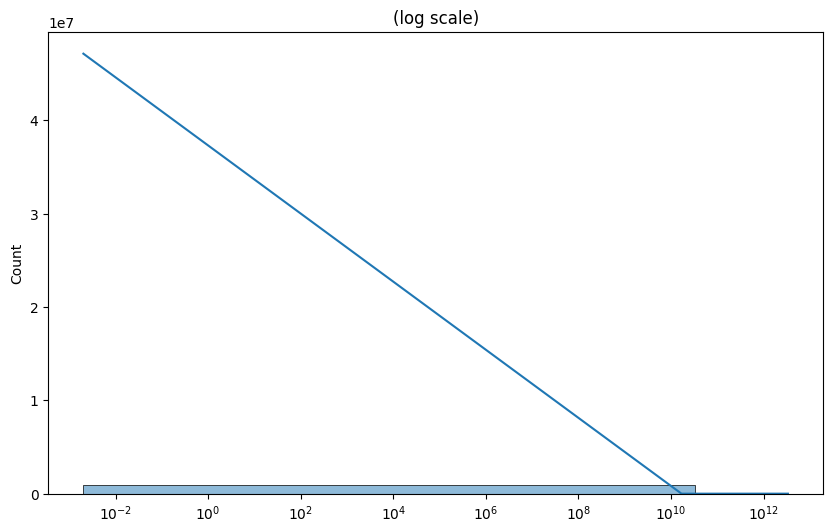

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# فرض می‌کنیم ستون price_per_m2 رو قبلاً ساخته باشی
# حذف مقادیر گمشده
ppm = df_clean["final_price"] / df_clean["building_size"]
ppm = ppm.dropna()

# رسم هیستوگرام (با log-scale برای دید بهتر)
plt.figure(figsize=(10,6))
sns.histplot(ppm, bins=100, kde=True)
plt.xscale("log")
plt.title("(log scale)")
plt.show()



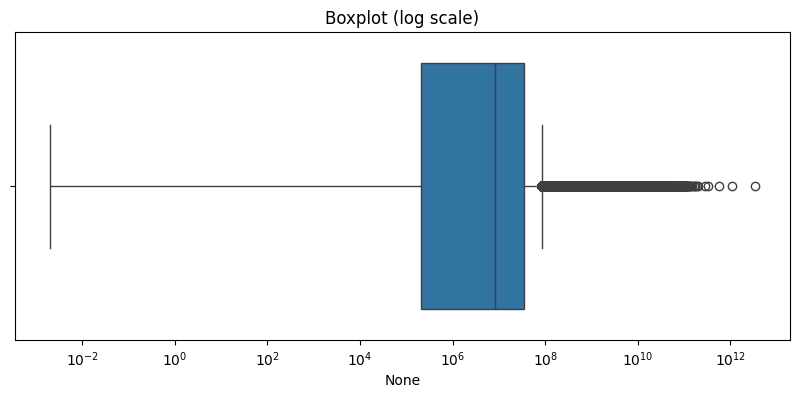

In [53]:
# رسم boxplot برای دیدن آوتلایرها
plt.figure(figsize=(10,4))
sns.boxplot(x=ppm)
plt.xscale("log")
plt.title("Boxplot (log scale)")
plt.show()

In [54]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------
# 1. ساخت target جدید: قیمت هر متر مربع
# ------------------------
df_clean["price_per_m2"] = df_clean["final_price"] / df_clean["building_size"]

# حذف ردیف‌های NaN یا building_size صفر
df_ppm = df_clean.dropna(subset=["price_per_m2", "building_size", "final_price"]).copy()
df_ppm = df_ppm[df_ppm["building_size"] > 0]

# ------------------------
# 2. فیلتر کردن آوتلایرها (۱ تا ۲۰۰ میلیون تومان بر متر مربع)
# ------------------------
df_ppm = df_ppm[(df_ppm["price_per_m2"] > 1_000_000) &
                (df_ppm["price_per_m2"] < 200_000_000)]

# ------------------------
# 3. تعریف target و features
# ------------------------
target = "price_per_m2"
drop_cols = ["final_price", "final_price_log", "price_per_m2"]

features = [col for col in df_ppm.columns if col not in drop_cols]

X = df_ppm[features]
y = df_ppm[target]

# ستون‌های دسته‌ای
categorical_features = ["has_warehouse", "has_parking",
                        "cat2_slug_commercial-rent",
                        "cat2_slug_commercial-sell",
                        "cat2_slug_residential-rent",
                        "cat2_slug_residential-sell"]

# تبدیل NaN در ستون‌های دسته‌ای به "Unknown"
for col in ["has_warehouse", "has_parking"]:
    X[col] = X[col].fillna("Unknown").astype(str)

# ------------------------
# 4. تقسیم داده‌ها
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool  = Pool(X_test, y_test, cat_features=categorical_features)

# ------------------------
# 5. مدل CatBoost
# ------------------------
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=8,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100,
)

model.fit(train_pool, eval_set=test_pool, use_best_model=True)

# ------------------------
# 6. ارزیابی
# ------------------------
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🔹 نتایج روی price_per_m2 (با حذف آوتلایر):")
print(f"RMSE: {rmse:,.0f} تومان بر متر مربع")
print(f"R²:   {r2:.4f}")

# SMAPE
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
print(f"SMAPE: {smape:.2f}%")


/tmp/ipython-input-1567185433.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["price_per_m2"] = df_clean["final_price"] / df_clean["building_size"]
/tmp/ipython-input-1567185433.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna("Unknown").astype(str)
/tmp/ipython-input-1567185433.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

0:	learn: 35409651.5058682	test: 35372363.4877105	best: 35372363.4877105 (0)	total: 657ms	remaining: 10m 56s
100:	learn: 31222339.3584639	test: 31257791.7842357	best: 31257791.7842357 (100)	total: 31.9s	remaining: 4m 43s
200:	learn: 31042887.0182573	test: 31103946.7966076	best: 31103946.7966076 (200)	total: 1m 2s	remaining: 4m 6s
300:	learn: 30952159.2713880	test: 31047300.0089328	best: 31047286.8929540 (299)	total: 1m 32s	remaining: 3m 34s
400:	learn: 30893059.8929414	test: 31016420.2821801	best: 31016420.2821801 (400)	total: 2m 4s	remaining: 3m 5s
500:	learn: 30842477.3208486	test: 30998450.9870569	best: 30998450.9870569 (500)	total: 2m 33s	remaining: 2m 33s
600:	learn: 30800227.1348098	test: 30986921.6575038	best: 30986921.6575038 (600)	total: 3m 5s	remaining: 2m 3s
700:	learn: 30766377.9096966	test: 30979039.2252729	best: 30978968.8986377 (699)	total: 3m 34s	remaining: 1m 31s
800:	learn: 30734437.5250925	test: 30974692.2109251	best: 30974692.2109251 (800)	total: 4m 6s	remaining: 1m

#model_5

In [63]:
data3 = pd.concat([data, divar_df[['floor', "has_elevator", "has_balcony", "location_latitude", "location_longitude",]]], axis=1)

In [66]:
Q1 = data3['final_price_log'].quantile(0.25)
Q3 = data3['final_price_log'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = data3[(data3['final_price_log'] >= lower) & (data3['final_price_log'] <= upper)]

In [67]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950694 entries, 1 to 999999
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   building_size               950494 non-null  float64
 1   rooms_count                 816005 non-null  float64
 2   final_price                 919341 non-null  float64
 3   construction_year           815828 non-null  float64
 4   has_warehouse               861724 non-null  object 
 5   has_parking                 728156 non-null  object 
 6   cat2_slug_commercial-rent   950694 non-null  bool   
 7   cat2_slug_commercial-sell   950694 non-null  bool   
 8   cat2_slug_residential-rent  950694 non-null  bool   
 9   cat2_slug_residential-sell  950694 non-null  bool   
 10  final_price_log             919341 non-null  float64
 11  floor                       541748 non-null  object 
 12  has_elevator                541749 non-null  object 
 13  has_balcony        

In [68]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------
# تعریف ستون‌ها
# ------------------------
target = "final_price_log"
features = [
    "building_size", "rooms_count", "construction_year",
    "has_warehouse", "has_parking", "has_elevator", "has_balcony",
    "floor", "location_latitude", "location_longitude",
    "cat2_slug_commercial-rent", "cat2_slug_commercial-sell",
    "cat2_slug_residential-rent", "cat2_slug_residential-sell"
]

# جدا کردن X و y
X = df_clean[features].copy()
y = df_clean[target]

# ------------------------
# ستون‌های دسته‌ای (object)
# ------------------------
categorical_features = ["has_warehouse", "has_parking", "has_elevator", "has_balcony", "floor"]

for col in categorical_features:
    X[col] = X[col].fillna("Unknown").astype(str)

# ------------------------
# تقسیم داده‌ها
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool  = Pool(X_test, y_test, cat_features=categorical_features)

# ------------------------
# مدل CatBoost
# ------------------------
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=8,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100,
    early_stopping_rounds=50
)

model.fit(train_pool, eval_set=test_pool, use_best_model=True)

# ------------------------
# ارزیابی
# ------------------------
y_pred_log = model.predict(X_test)

rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2_log = r2_score(y_test, y_pred_log)

print("🔹 نتایج روی log-price:")
print(f"RMSE (log): {rmse_log:.4f}")
print(f"R² (log):   {r2_log:.4f}")

# تبدیل به قیمت واقعی
y_pred_real = np.exp(y_pred_log)
y_test_real = np.exp(y_test)

rmse_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
r2_real = r2_score(y_test_real, y_pred_real)

print("\n🔹 نتایج روی قیمت واقعی (تومان):")
print(f"RMSE (real): {rmse_real:,.0f} تومان")
print(f"R² (real):   {r2_real:.4f}")


0:	learn: 2.6677623	test: 2.6703647	best: 2.6703647 (0)	total: 1.53s	remaining: 25m 33s
100:	learn: 1.2110600	test: 1.2294860	best: 1.2294860 (100)	total: 2m 21s	remaining: 20m 55s
200:	learn: 1.1972435	test: 1.2183728	best: 1.2183728 (200)	total: 4m 39s	remaining: 18m 30s
300:	learn: 1.1896008	test: 1.2135622	best: 1.2135622 (300)	total: 6m 56s	remaining: 16m 7s
400:	learn: 1.1850011	test: 1.2112805	best: 1.2112805 (400)	total: 9m 10s	remaining: 13m 41s
500:	learn: 1.1817612	test: 1.2098947	best: 1.2098947 (500)	total: 11m 20s	remaining: 11m 17s
600:	learn: 1.1785365	test: 1.2085685	best: 1.2085685 (600)	total: 13m 34s	remaining: 9m
700:	learn: 1.1756377	test: 1.2075726	best: 1.2075726 (700)	total: 15m 47s	remaining: 6m 44s
800:	learn: 1.1733834	test: 1.2071852	best: 1.2071852 (800)	total: 17m 57s	remaining: 4m 27s
900:	learn: 1.1711732	test: 1.2064159	best: 1.2064159 (900)	total: 20m 5s	remaining: 2m 12s
999:	learn: 1.1692582	test: 1.2058992	best: 1.2058991 (998)	total: 22m 17s	remai

In [69]:
smape = 100 * np.mean(
    2 * np.abs(y_pred_real - y_test_real) / (np.abs(y_test_real) + np.abs(y_pred_real))
)

print(f"SMAPE: {smape:.2f}%")


SMAPE: 45.75%
